In [106]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from utilities import *
from grid_cell_utilities import *
from ripser import ripser
import umap
import plotly.express as px
from IPython.display import Image, display

In [107]:
# Load grid cells
with open('data_files/GridCellDictionary3June2025.pkl', 'rb') as file:
    GridCellDictionary = pickle.load(file)

In [108]:
grid_cell_samples = [234, 3029, 4467, 4381, 1317, 1228, 610, 191, 3408, 2107, 1258, 3729, 4302, 3318, 2993, 3070, 4175, 3033, 2812, 2519, 1310, 4019, 1524, 4154, 3047, 593, 1327, 3022, 2813, 4010, 2840, 2173, 3365, 3260, 2948, 2946, 3052, 4083, 3406, 4822, 1312, 2886, 4071, 4640, 1574, 1532, 604, 589, 3411, 2106, 1085, 3038, 3076, 3342, 3730, 1323, 4387, 2300, 2296, 3243, 3068, 3584, 2945, 4628, 2618, 3593, 1235, 4081, 121, 3263, 1528, 1442, 4029, 3368, 187, 379, 4094, 4150, 2282, 3085, 601, 595, 2919, 882, 2641, 4489, 844, 1436, 2838, 4007, 1253, 1105, 4149, 3328, 4481, 1430, 3332, 4085, 4390, 3393]



In [109]:
# Construct rate map tensors

num_neurons = len(grid_cell_samples)
rate_map_tensor = np.zeros((100, 100, num_neurons))

for list_index, neuron_index in enumerate(grid_cell_samples):
    rate_map = GridCellDictionary[neuron_index]['fully_processed_rate_map']
    rate_map_tensor[:, :, list_index] = rate_map

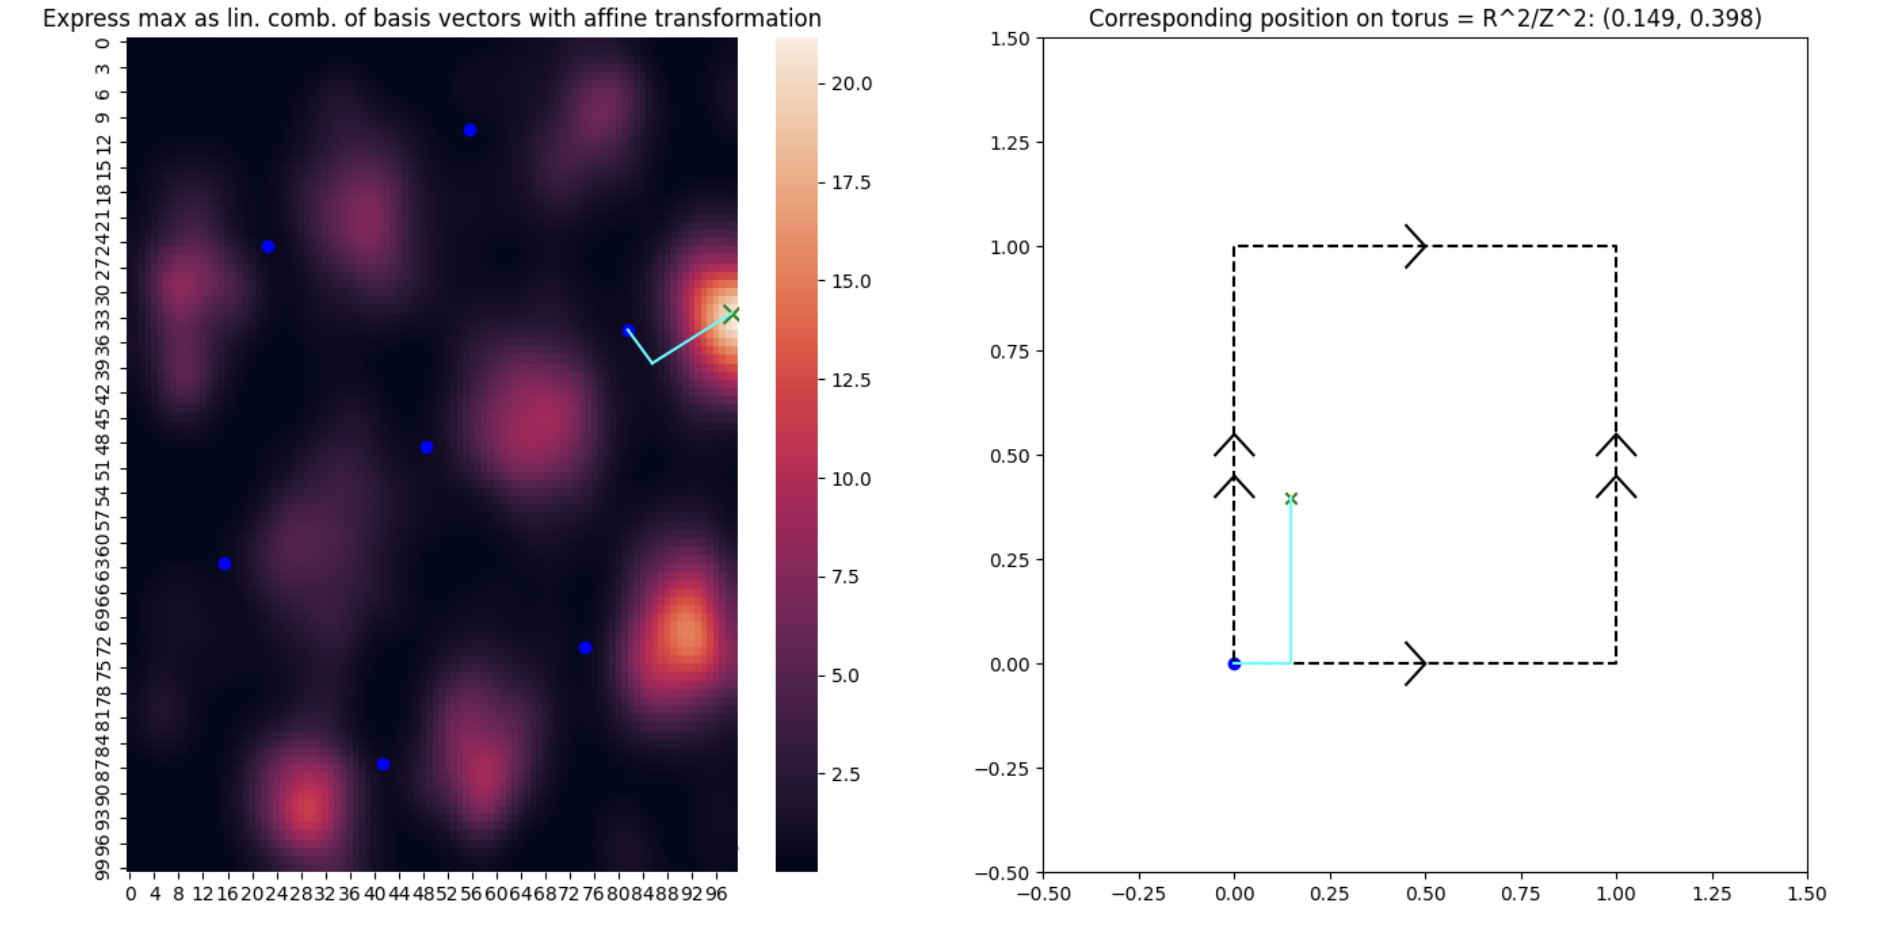

In [110]:
display(Image("data_files/toroidal_position.png"))

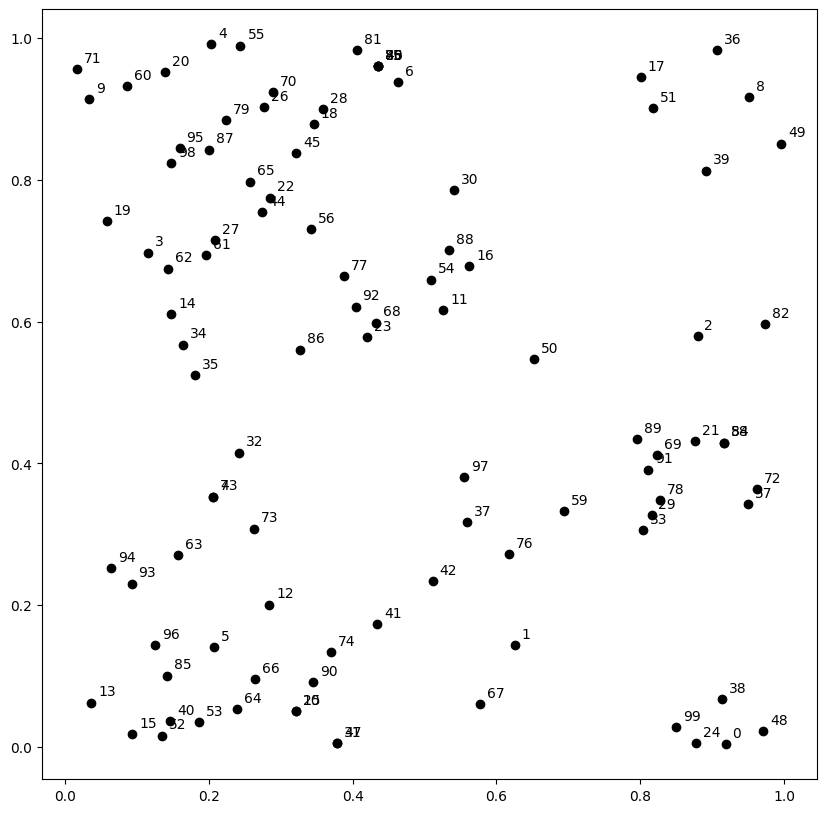

In [111]:
fig, ax = plt.subplots(figsize = (10, 10))

for list_index, cell_index in enumerate(grid_cell_samples):
    position_on_torus = GridCellDictionary[cell_index]['position_on_torus']
    x_pos = position_on_torus[0][0]
    y_pos = position_on_torus[1][0]
    ax.scatter(x_pos, y_pos, c = 'black')

    # Add label (e.g., using cell_index or dict_index)
    ax.annotate(str(list_index), (x_pos, y_pos), 
                textcoords="offset points", xytext=(5, 5), ha='left', fontsize=10)

# Make cells

In [112]:
# Make a walk that samples every point in the space (teleports)

teleporting_walk = []
for x in np.linspace(-.7, .7, 100):
    for y in np.linspace(-.7, .7, 100):
        teleporting_walk.append([x, y])

teleporting_walk = np.array(teleporting_walk)


teleporting_walk_as_matrix_indices = convert_walk_in_square_enclosure_to_list_of_matrix_indices(10000, teleporting_walk, -.7, .7, -.7, .7, 100, 100)

# Make a grid cell

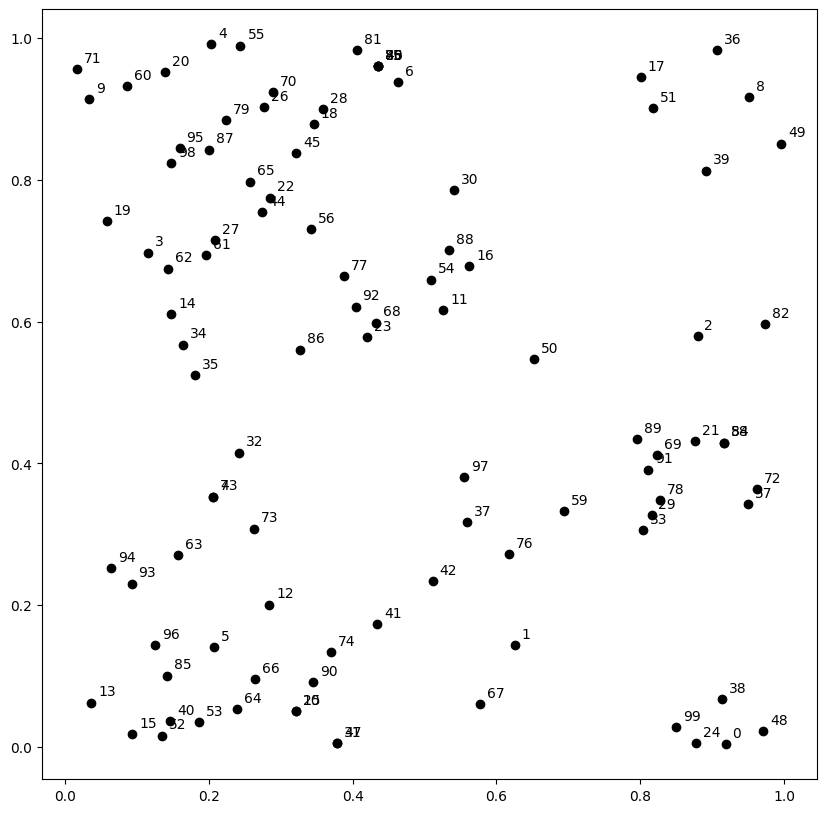

In [113]:
fig, ax = plt.subplots(figsize = (10, 10))

for list_index, cell_index in enumerate(grid_cell_samples):
    position_on_torus = GridCellDictionary[cell_index]['position_on_torus']
    x_pos = position_on_torus[0][0]
    y_pos = position_on_torus[1][0]
    ax.scatter(x_pos, y_pos, c = 'black')

    # Add label (e.g., using cell_index or dict_index)
    ax.annotate(str(list_index), (x_pos, y_pos), 
                textcoords="offset points", xytext=(5, 5), ha='left', fontsize=10)

In [114]:
weight_matrix = np.zeros((1, 100))

cells_to_connect = [
    11, 54, 16, 88
]
weight_matrix[0, cells_to_connect] = 1

In [115]:
# Calculate input and output response

response_matrix = compute_grid_cell_response_given_rate_map_tensor_and_walk_as_matrix_indices(rate_map_tensor, teleporting_walk_as_matrix_indices)

output_response = weight_matrix@response_matrix

output_response = np.maximum(0, output_response - 0.25*np.max(output_response))

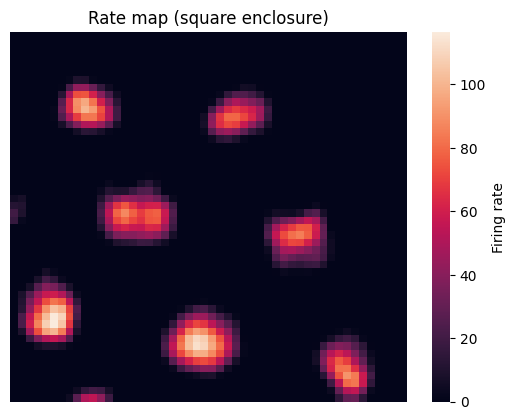

In [116]:
# Get rate map and plot

rate_map, _, _, _ = binned_statistic_2d(teleporting_walk[:, 0], teleporting_walk[:, 1], output_response[0, :], bins = 50)

fig, ax = plt.subplots()

sns.heatmap(rate_map, ax = ax, cbar_kws={'label': 'Firing rate'})

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Rate map (square enclosure)')


plt.show()


# Make a band cell

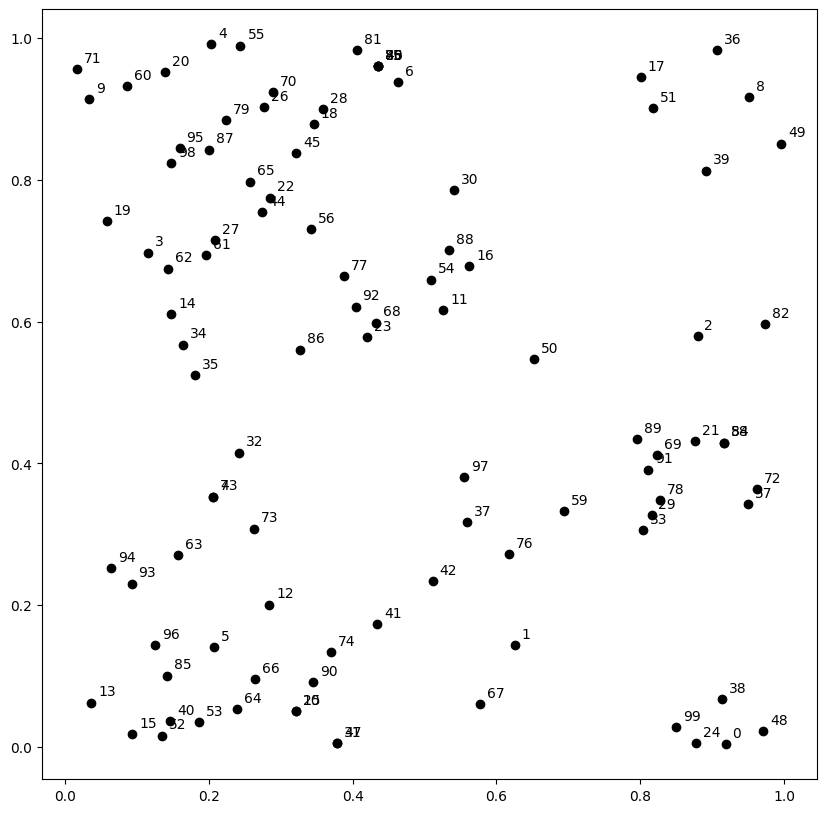

In [117]:
fig, ax = plt.subplots(figsize = (10, 10))

for list_index, cell_index in enumerate(grid_cell_samples):
    position_on_torus = GridCellDictionary[cell_index]['position_on_torus']
    x_pos = position_on_torus[0][0]
    y_pos = position_on_torus[1][0]
    ax.scatter(x_pos, y_pos, c = 'black')

    # Add label (e.g., using cell_index or dict_index)
    ax.annotate(str(list_index), (x_pos, y_pos), 
                textcoords="offset points", xytext=(5, 5), ha='left', fontsize=10)

In [118]:
weight_matrix = np.zeros((1, 100))

cells_to_connect = [
    64, 66, 12, 73, 32, 35, 34, 86, 14, 62, 27, 44, 22, 65, 87, 79, 70, 55
]
weight_matrix[0, cells_to_connect] = 1

In [119]:
# Calculate input and output response

response_matrix = compute_grid_cell_response_given_rate_map_tensor_and_walk_as_matrix_indices(rate_map_tensor, teleporting_walk_as_matrix_indices)

output_response = weight_matrix@response_matrix

output_response = np.maximum(0, output_response - 0.15*np.max(output_response))

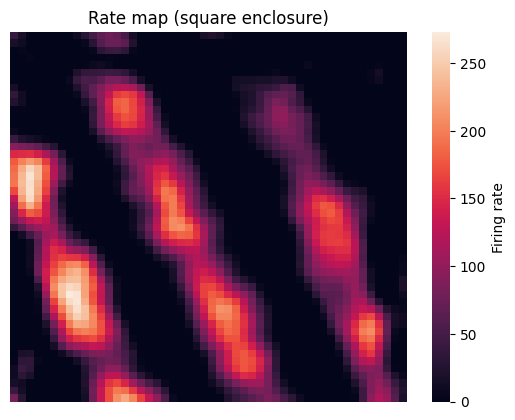

In [120]:
# Get rate map and plot

rate_map, _, _, _ = binned_statistic_2d(teleporting_walk[:, 0], teleporting_walk[:, 1], output_response[0, :], bins = 50)

fig, ax = plt.subplots()

sns.heatmap(rate_map, ax = ax, cbar_kws={'label': 'Firing rate'})

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Rate map (square enclosure)')


plt.show()
